In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Human_Resources.csv')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Separando o dataframe em colaboradores que saíram e que não sairam
left_df = df[df['Attrition'] == 'Yes']
stayed_df = df[df['Attrition'] == 'No']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1fd220590>,
      dtype=object)

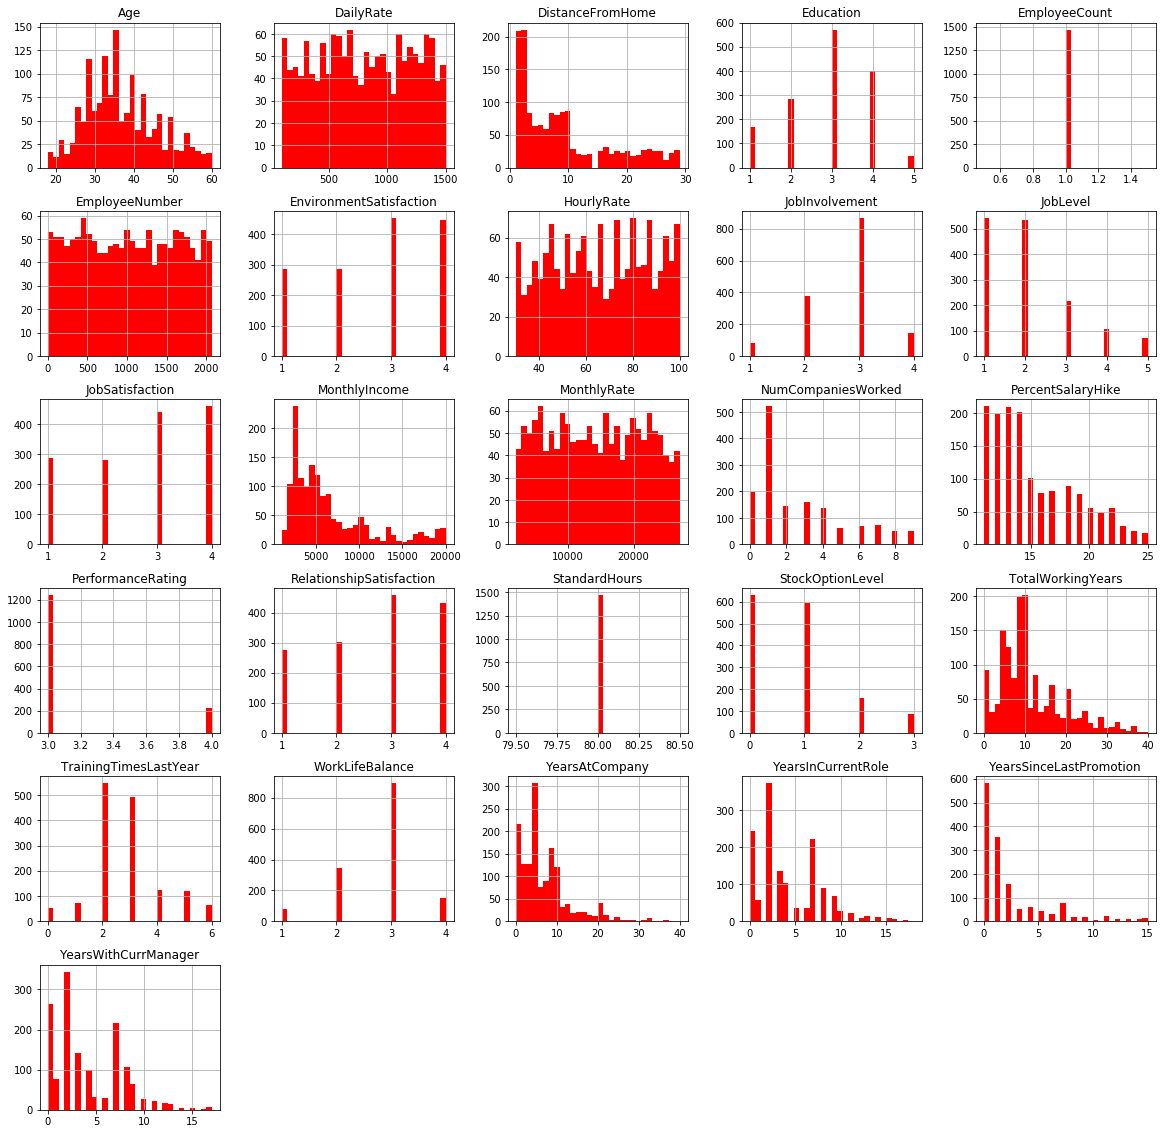

In [5]:
#Plotando um histograma com 30 faixas
df.hist(bins= 30, figsize=(20,20), color='r')

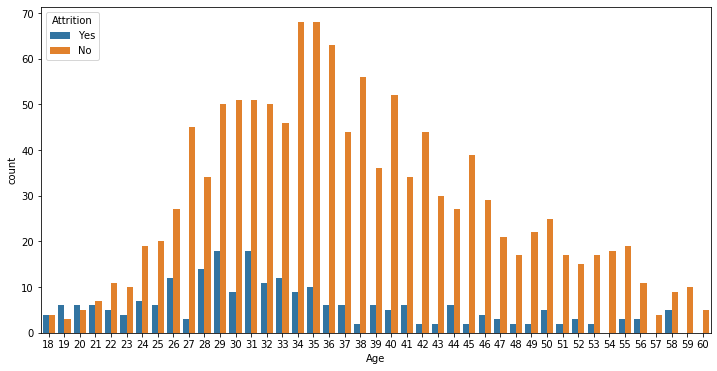

In [6]:
plt.figure(figsize=[12,6])
sns.countplot(x = 'Age', hue='Attrition', data=df);

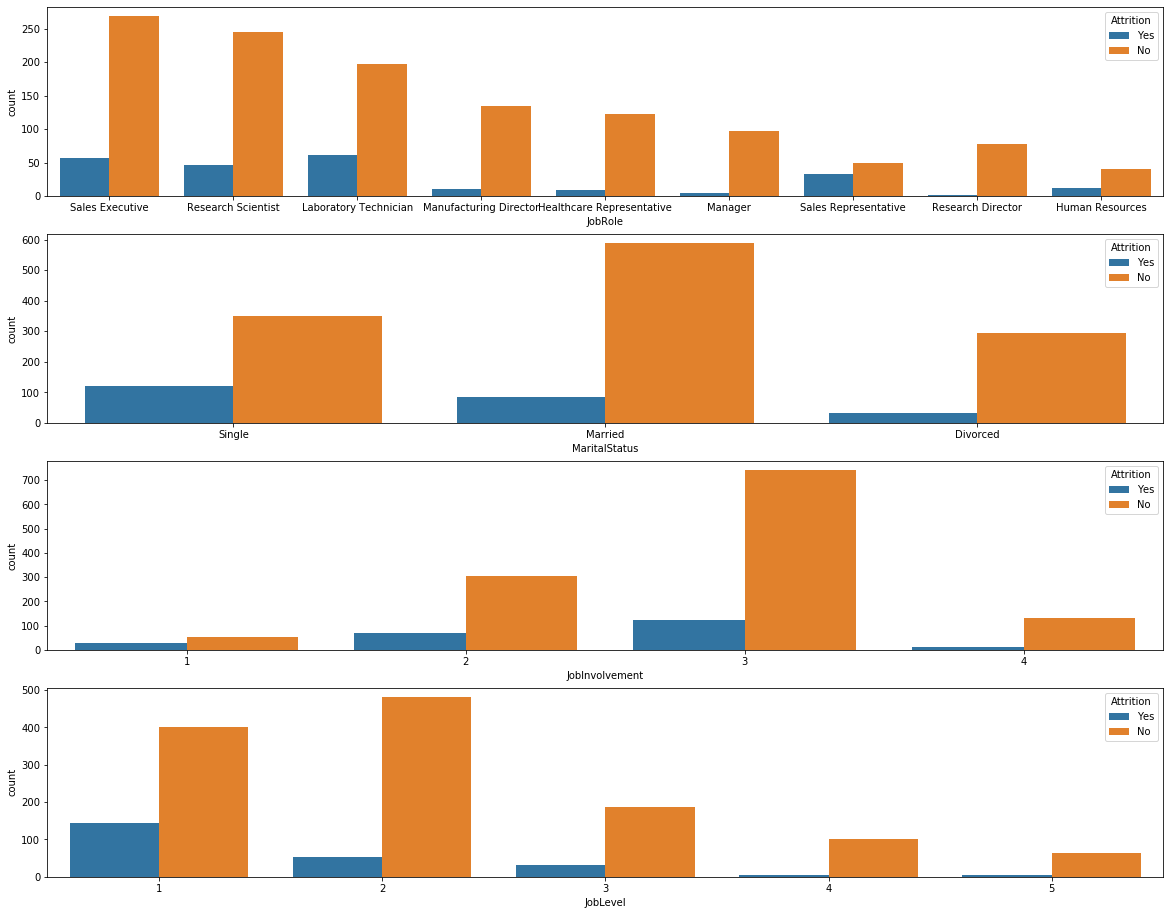

In [7]:
plt.figure(figsize=[20,16])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df)

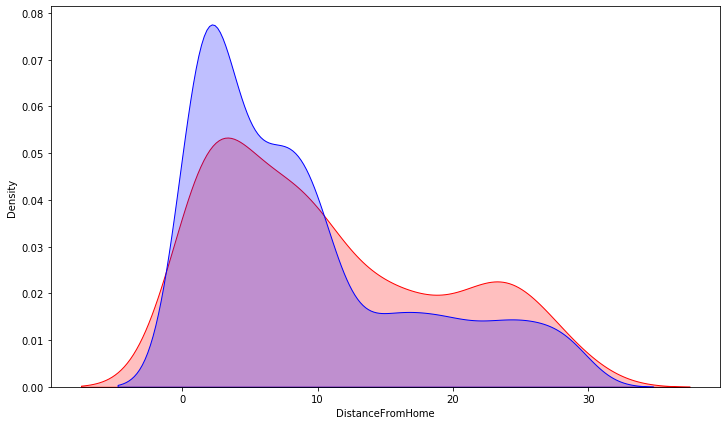

In [8]:
#implementando KDE(Kernel Density estimate)
plt.figure(figsize=[12,7])
sns.kdeplot(left_df['DistanceFromHome'], label= 'Funcionários que saíram', shade=True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label= 'Funcionários que ficaram', shade=True, color = 'b')

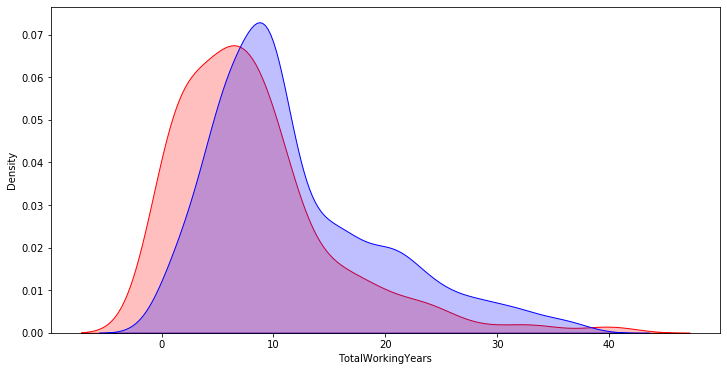

In [9]:
plt.figure(figsize=[12,6])
sns.kdeplot(left_df['TotalWorkingYears'], label= 'Funcionários que saíram', shade=True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label= 'Funcionários que ficaram', shade=True, color = 'b')

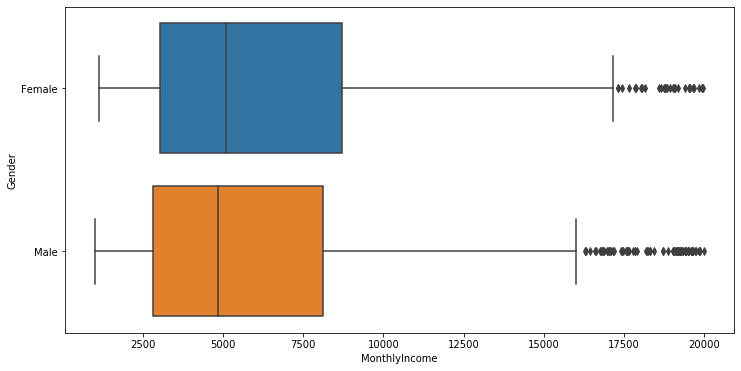

In [10]:
plt.figure(figsize=[12,6])
sns.boxplot(x='MonthlyIncome', y='Gender', data=df)

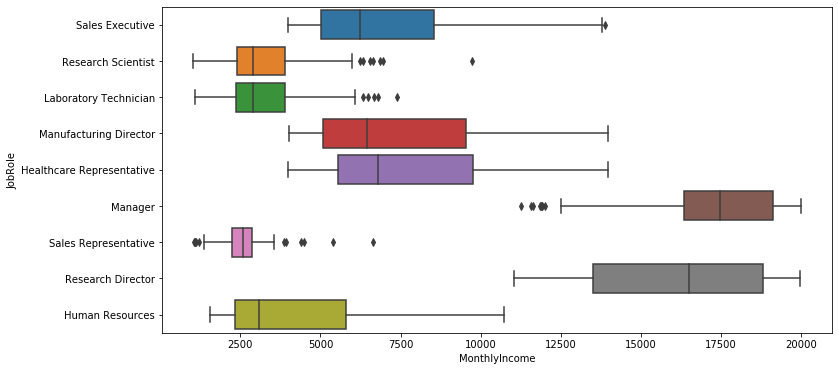

In [11]:
#Analisando os salários por departamento
plt.figure(figsize=[12,6])
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=df)

In [12]:
#Usando uma função lambda para alterar valores nas colunas selecionadas
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [13]:
#verifica-se que o salário da função Sales Representative está muito abaixo dos demais 
#por isso, vamos verificar se nessa categoria, as pessoas tendem a sair mais

left_job = left_df[['Attrition', 'JobRole']].groupby ('JobRole').count().reset_index()
stay_in_job = stayed_df[['Attrition', 'JobRole']].groupby ('JobRole').count().reset_index()
total = df[['Attrition', 'JobRole']].groupby ('JobRole').count().reset_index()

In [14]:
left_job.rename(
    columns=({ 'Attrition': 'Attrition_y', 'JobRole':'JobRole_Y'}), inplace=True)
stay_in_job.rename(
    columns=({ 'Attrition': 'Attrition_n', 'JobRole':'JobRole_n'}), inplace=True)

In [15]:
left_job = pd.DataFrame(left_job)
stay_in_job = pd.DataFrame(stay_in_job)
total = pd.DataFrame(total)
concat = pd.concat([left_job, stay_in_job, total], axis=1)

In [16]:
concat['percentual'] = concat['Attrition_y'] / concat['Attrition']

In [17]:
concat.drop(['JobRole_Y', 'JobRole_n'], axis=1, inplace=True)

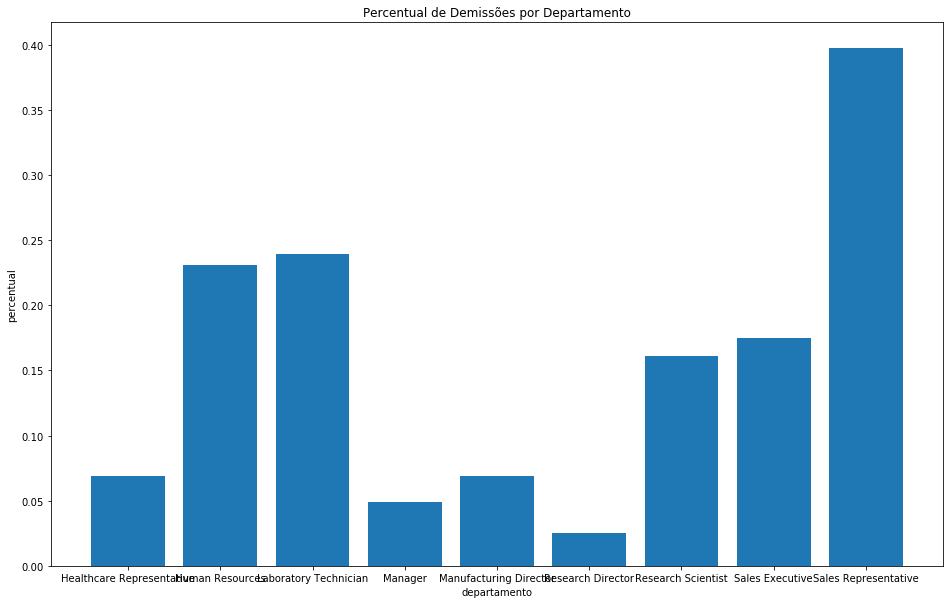

In [18]:
plt.figure(figsize=[16,10])
plt.bar(concat['JobRole'], concat['percentual'])
plt.title("Percentual de Demissões por Departamento")
plt.xlabel("departamento")
plt.ylabel("percentual")

plt.show()

In [19]:
#Verifica-se que, o departamento de Sales Representative é o que possui o maior nivel de demissões

# Seria o baixo salário uma variável importante para a saída destes colaboradores?#Definindo as variáveis categoricas
x_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [20]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to re

In [21]:
#Transformando em dataframe
x_cat = pd.DataFrame(x_cat)

In [22]:
#Definindo as variáveis continuas
x_numerical = df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

In [23]:
# concatenando os dataframes numericos e categoricos
result = pd.concat([x_cat, x_numerical], axis=1)

In [24]:
#normalizando uma base de dados

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(result)

In [25]:
#Definindo a variável resposta
y = df['Attrition']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [28]:
#importando o modelo de regressão logistica
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [29]:
logistic.fit(x_train,y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = logistic.predict(x_test)
y_pred

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
#Importanto métricas para analisar os resultados do modelo
from sklearn.metrics import accuracy_score

In [32]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix

In [34]:
cm = confusion_matrix(y_pred,y_test)

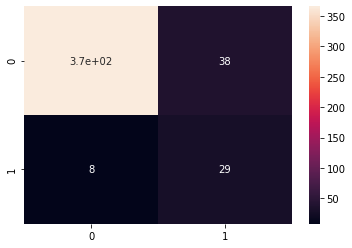

In [35]:
sns.heatmap(cm, annot=True)

In [36]:
cm

array([[366,  38],
       [  8,  29]])

In [37]:
from sklearn.metrics import classification_report

In [38]:
logistic_score = classification_report(y_test, y_pred)

In [41]:
print(logistic_score)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       374
           1       0.78      0.43      0.56        67

    accuracy                           0.90       441
   macro avg       0.84      0.71      0.75       441
weighted avg       0.89      0.90      0.88       441



In [42]:
from sklearn.ensemble import RandomForestClassifier

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import pred

In [43]:
forest = RandomForestClassifier()

In [44]:
forest.fit(x_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_pred = forest.predict(x_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [60]:
rf_score = classification_report(y_pred,y_test)

In [61]:
print(rf_score)

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       425
           1       0.16      0.69      0.27        16

    accuracy                           0.86       441
   macro avg       0.58      0.78      0.59       441
weighted avg       0.96      0.86      0.90       441



In [49]:
cm = confusion_matrix(y_pred,y_test)

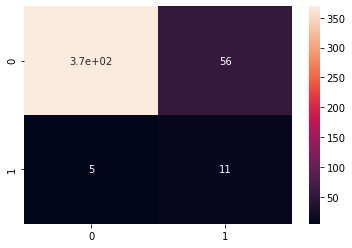

In [51]:
sns.heatmap(cm, annot=True)